I will be performing unsupervised clustering for customer data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

In [2]:
#Loading the data
df = pd.read_csv(r"./marketing_campaign.csv", sep="\t", encoding="unicode_escape")
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
#Understanding the data briefly

print(df.shape);
#print(df.describe());
print(df.info());

(2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 n

In [4]:
#correcting the data type from Dt_Customer that supposed to be datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
#checking if there's any missing value

df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [6]:
#handling missing values

df = df.dropna()

In [7]:
df.isna().sum().sort_values(ascending=False)

ID                     0
NumDealsPurchases      0
Z_Revenue              0
Z_CostContact          0
Complain               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
MntGoldProds           0
Year_Birth             0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Response               0
dtype: int64

In [8]:
#Next is to calculate how long customer has been in the firm's database with the current date
#being the most recent recorded customer

print("The newest customer's enrolment date:{}".format(df['Dt_Customer'].max()))

The newest customer's enrolment date:2014-06-29 00:00:00


In [9]:
max_date = max(df['Dt_Customer'])
df['Cust_For'] = (max_date - df['Dt_Customer']).dt.days
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cust_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,161
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,0,0,3,11,0,293
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,0,0,0,3,11,0,593
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,0,0,0,0,0,0,3,11,0,417
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,0,0,0,0,3,11,1,388
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,1,0,0,0,0,0,3,11,0,108


In [10]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [11]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Next, let's create some additional columns from the information that we have now:
1. Age: we can extract it from "Year_Birth"
2. Spent: total customer's spending in the firm
3. Living_With: from "Marital_Status"
4. Children
5. Family size
6. Is_parent
7. Education

and make sure to also drop some redundant information

In [12]:
#Feature engineering one: Age
current_year = dt.datetime.now().year
df['Cust_age'] = current_year - df['Year_Birth']

In [13]:
#Total spending

df['Tot_Spending'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts']
+ df['MntSweetProducts'] + df['MntWines']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cust_For,Cust_age,Tot_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,663,66,894
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,113,69,15
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,312,58,329
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,139,39,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,161,42,222


In [14]:
#Deriving the living situation
df['Living_With'] = df['Marital_Status'].replace({"Married": "Partner", "Together":"Partner",
                                                  "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone",
                                                  "Divorced":"Alone", "Single":"Alone"})

#Indicating number of children
df["Children"] = df['Kidhome'] + df['Teenhome']

#Total personnel in the household
df['Family_size'] = df['Living_With'].replace({"Alone": 1, "Partner":2}) 
df['Family_size'] = df['Family_size'].astype(int) + df['Children']
df['Is_Parent'] = np.where(df.Children>0,1,0)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Cust_For,Cust_age,Tot_Spending,Living_With,Children,Family_size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,663,66,894,Alone,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,113,69,15,Alone,2,3,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,312,58,329,Partner,0,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,139,39,39,Partner,1,3,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,161,42,222,Partner,1,3,1


In [15]:
#Simplifying the education level

df['Education'] = df['Education'].replace({"Basic":"Undergraduate", "2n Cycle": "Undergraduate",
                                           "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [16]:
#Dropping the redundant columns

df = df.drop(['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue','Year_Birth','ID'], axis = 1)

In [17]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cust_For,Cust_age,Tot_Spending,Children,Family_size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,353.521209,54.179603,274.954874,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,202.434667,11.985554,310.538175,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,46.000000,37.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,355.500000,53.000000,133.000000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,529.000000,64.000000,429.250000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,130.000000,1728.000000,3.000000,5.000000,1.000000


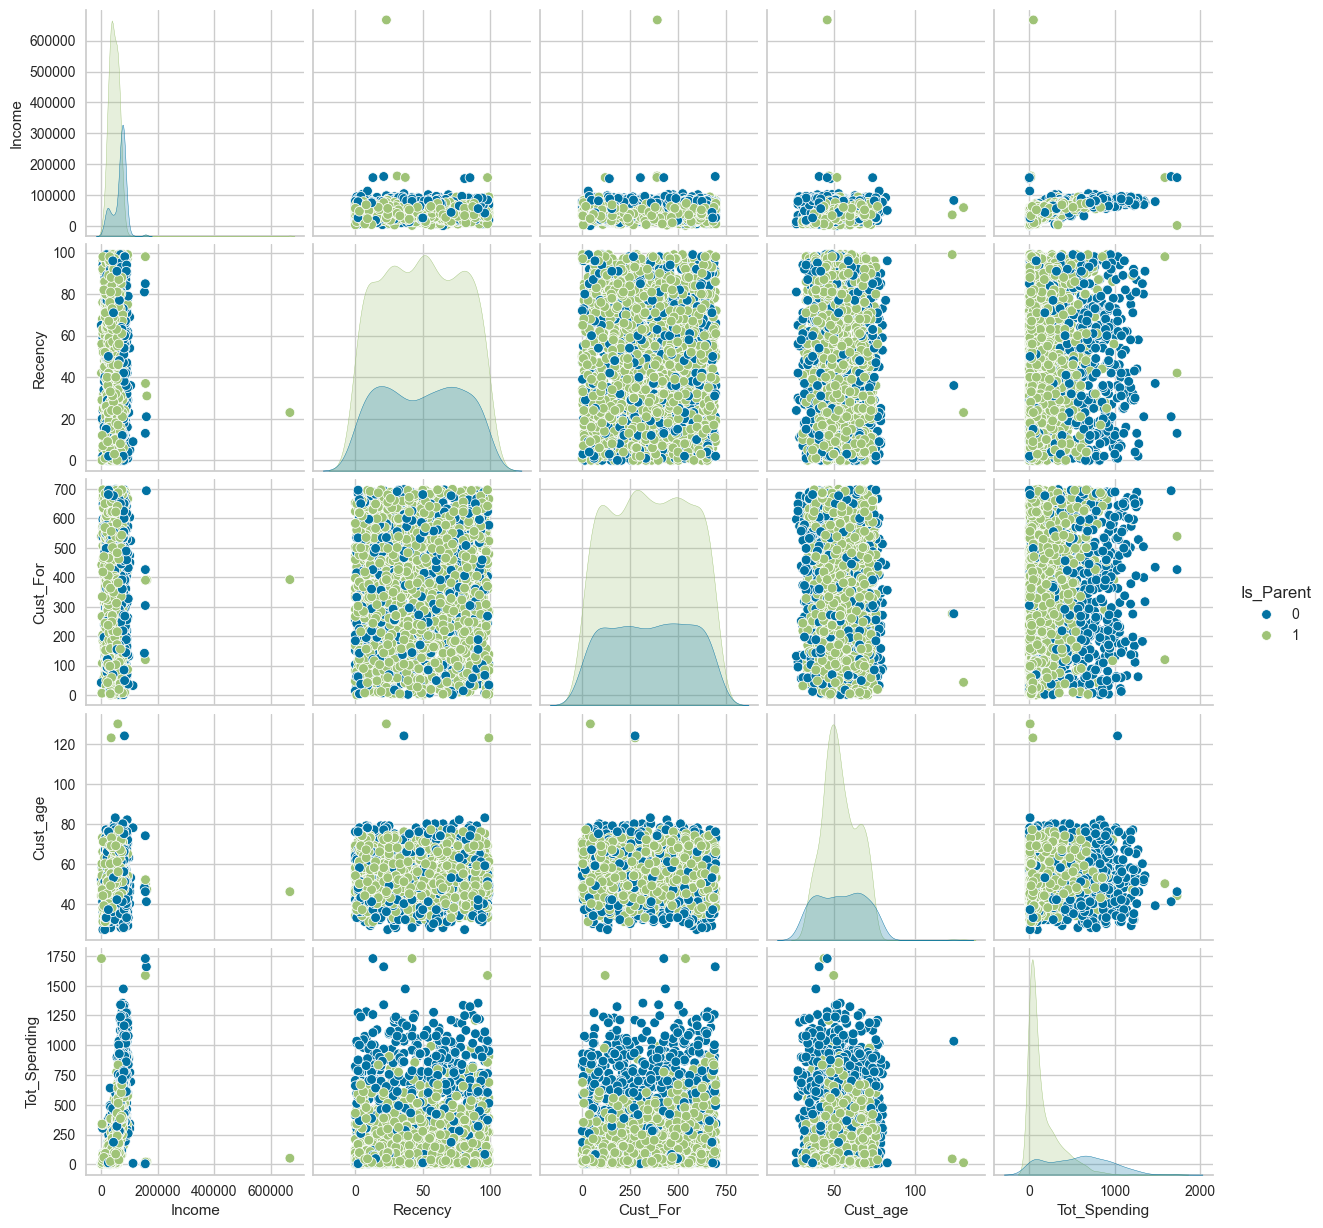

In [18]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
sns.pairplot(df[['Income', 'Recency', 'Cust_For', 'Cust_age', 'Tot_Spending', 'Is_Parent']], hue='Is_Parent')
plt.show()


In [19]:
#eliminate the outliers datapoint from metrics income an age

df = df[df['Cust_age']<90]
df = df[df['Income']<600000]

<Axes: >

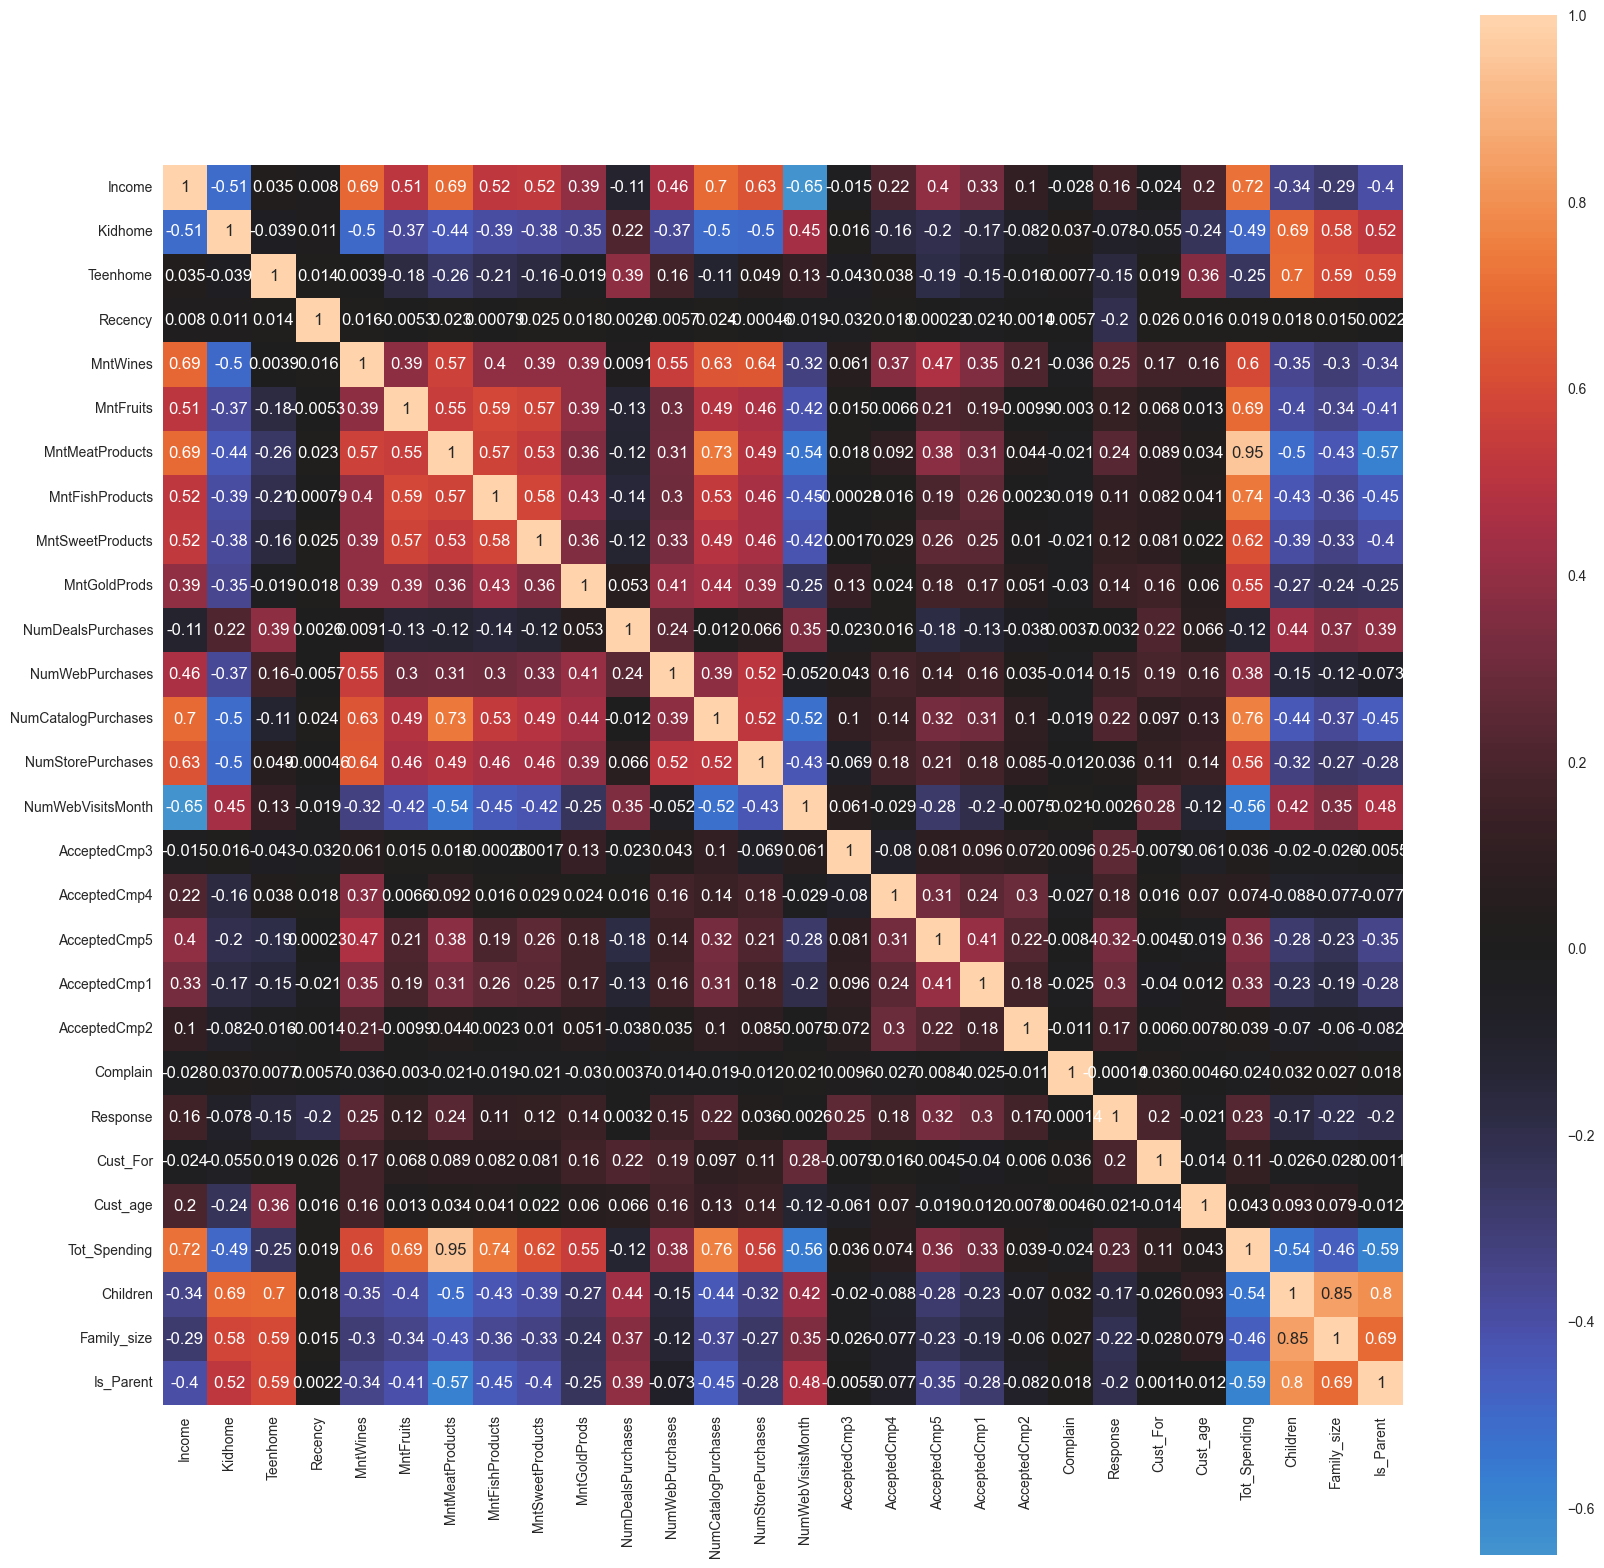

In [20]:
#correlation matrix
numeric_df = df.select_dtypes(include='number')
corrmat = numeric_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, square=True, center=0)

In [21]:
#Data Processing

#Get list of categorical variable
categorical_column = df.select_dtypes(include=['object']).columns

In [22]:
#convert categorical into numerical

LE = LabelEncoder()

df[categorical_column] = df[categorical_column].apply(lambda col:LE.fit_transform(col))

#now all features re numerical

In [23]:
#Creating copy of data

ds = df.copy()
#creating subset of dataframe by dropping the features on deals and accepted promotions

cols_del = ['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2',
            'Complain','Response']

ds = ds.drop(cols_del, axis=1)

#Scaling
scaler= StandardScaler()
scaler.fit(ds)
scaled_data = scaler.transform(ds)
scaled_ds = pd.DataFrame(scaled_data, columns=ds.columns)

In [24]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cust_For,Cust_age,Tot_Spending,Living_With,Children,Family_size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.995666,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.837942,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.174291,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.760574,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.170642,0.740959,0.069987,0.449070,0.632456


In [25]:
#Dimensionality Reduction

#Initiating PCA to reduce dimensions aka features to 3

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns =(['col1','col2','col3']))
PCA_ds.describe().round(2)

,col1,col2,col3
count,2212.00,2212.00,2212.00
mean,0.00,0.00,0.00
std,2.88,1.69,1.23
min,-5.97,-4.20,-3.66
25%,-2.48,-1.33,-0.85
50%,-0.79,-0.16,-0.06
75%,2.33,1.22,0.86
max,7.40,6.00,6.73


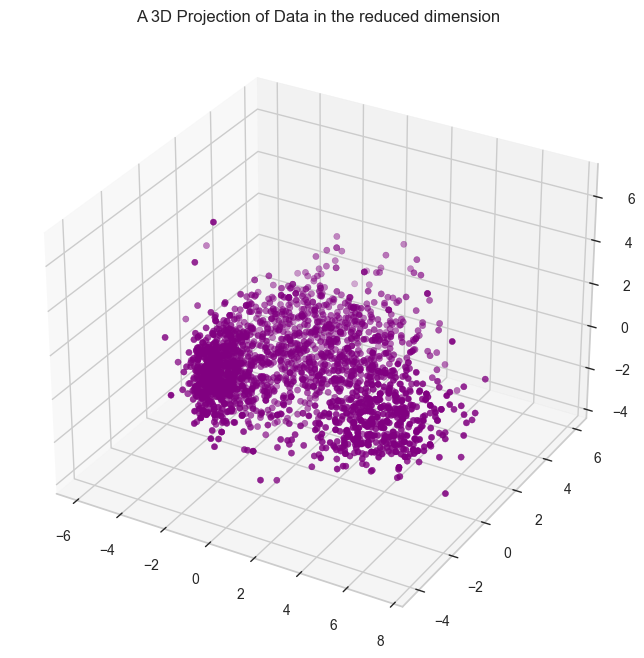

In [26]:
#3D projection of data in the reduced dimension

x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(x,y,z, c = 'purple', marker ='o')
ax.set_title("A 3D Projection of Data in the reduced dimension")
plt.show()

Clustering steps:
1. Elbow method to determine the number of cluster to be performed
2. Clustering via agglomerative clustering
3. examining the cluster formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


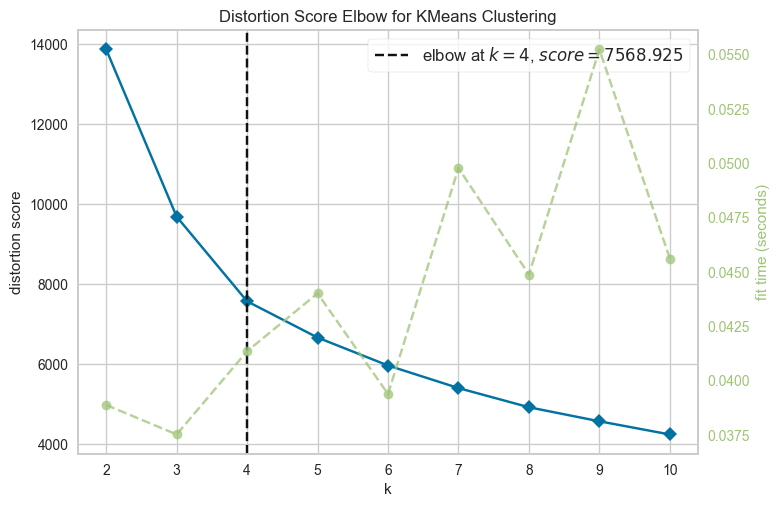

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
#Quick examination of elbow method to find numbers of clusters to make

print("Elbow Method to determine the number of clusters to be formed:")
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [28]:
#from the examination above, it's shown that 4 is the optimal number of cluster for this data.
#Next we will be fitting the Agglomerative Clustering Model to get the final clusters

#Inititating the Agglomerative Clustering Model

AC = AgglomerativeClustering(n_clusters=4)
#fit model and predict clusters

yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds['Clusters'] = yhat_AC
#Adding the clusters feature to the original dataframe
df['Clusters'] = yhat_AC

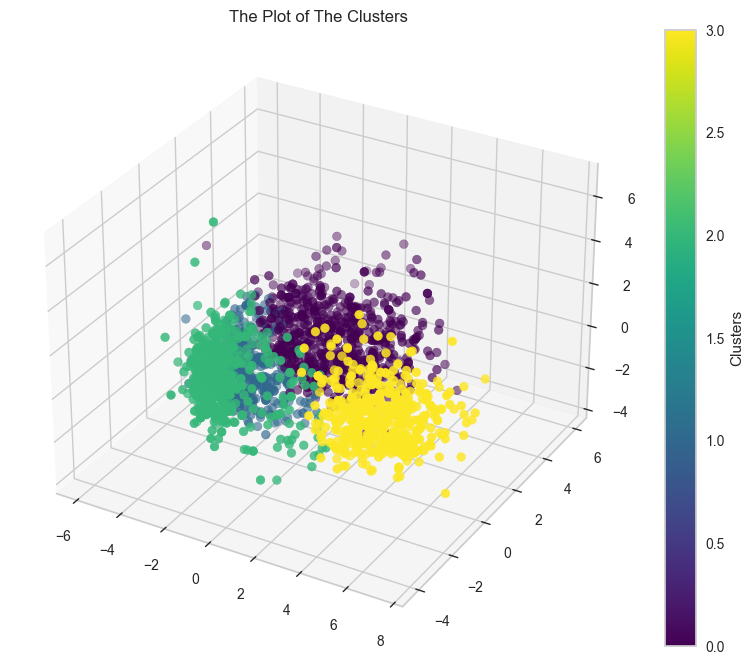

In [29]:
#To assess the clusters formed, ler's have a look at the 3D distribution of the clusters

#Plotting the clusters

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
scatter = ax.scatter(x, y, z, s=40, c=PCA_ds['Clusters'], marker='o', cmap='viridis')

# Create a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Clusters')

# Set the title
ax.set_title("The Plot of The Clusters")

# Show the plot
plt.show()

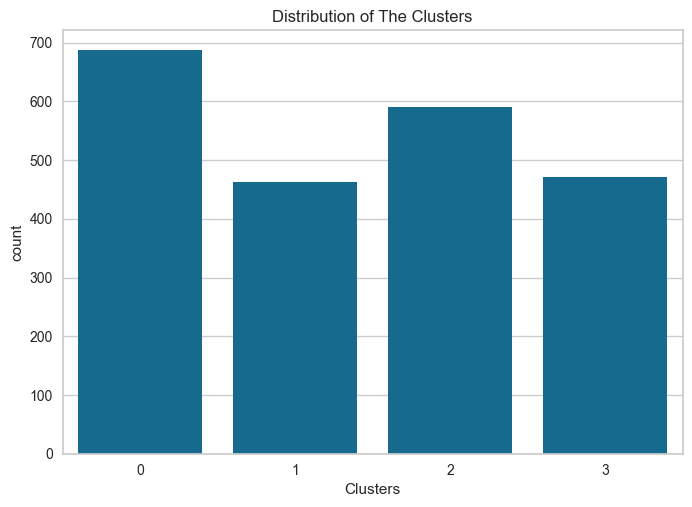

In [30]:
#Evaluating the models
#The purpose is to understand the patterns and determine the nature of the clusters' pattern

#Firstly, let's take a look at the group distribution of clustering

#Plotting countplot of clusters

pl = sns.countplot(x=df['Clusters'])
pl.set_title("Distribution of The Clusters")
plt.show()

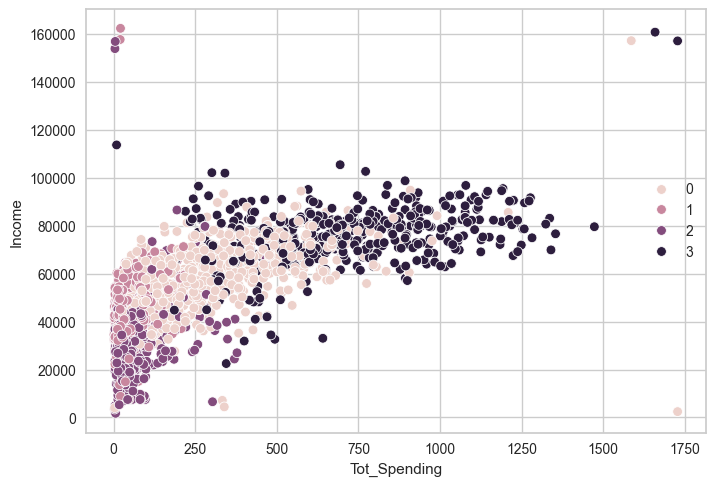

In [31]:
#The clusters seems fairly distributed

pl = sns.scatterplot(data=df, x=df['Tot_Spending'], y=df['Income'], hue=df['Clusters'])
plt.legend()
plt.show()

group 0: high spending, average income
group 1: low spending, high income
group 2: low spending, low income
group 3: high spending, high income

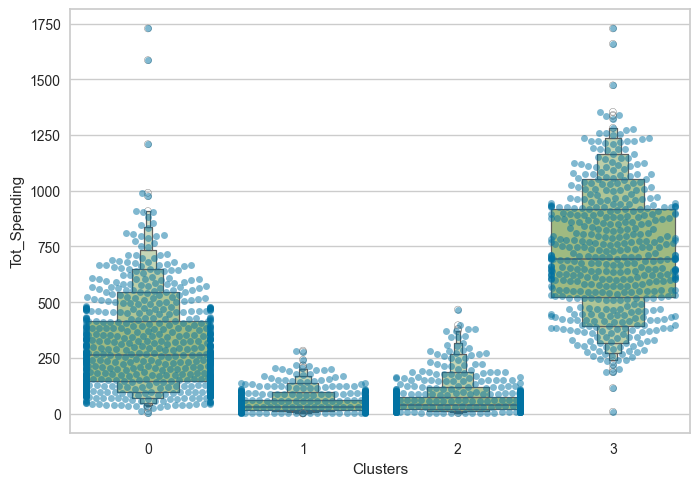

In [32]:
#Next take a look at the detailed distribution of clusters as per the various products in the data
#Namely: Wines, Fruits, Meat, Fish, Sweets, and Gold

plt.figure()
pl = sns.swarmplot(x=df['Clusters'], y = df['Tot_Spending'], alpha=0.5)
pl = sns.boxenplot(x=df['Clusters'], y=df['Tot_Spending'])
plt.show()

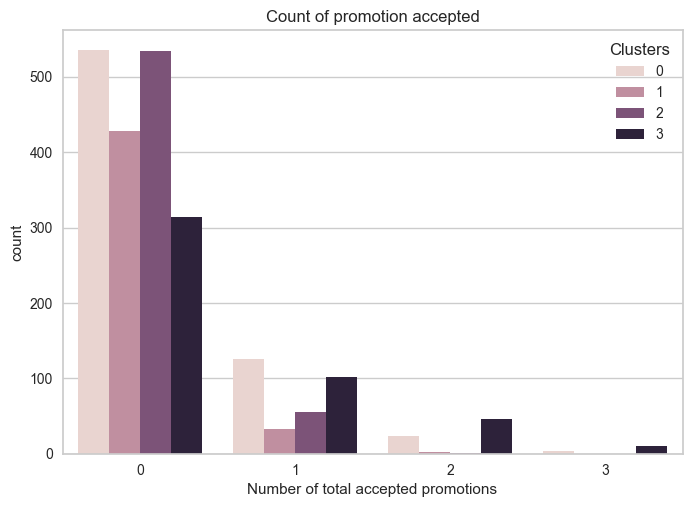

In [33]:
#From the plot above, it's clear that cluster 3 is the biggest spender then followed by cluster 0

#now understanding how the campaigns work in the pasdt

df['Total_Promos'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4']
+ df['AcceptedCmp5']

#plotting count of total accepted

plt.figure()
pl = sns.countplot(x = df['Total_Promos'], hue=df['Clusters'])
pl.set_title("Count of promotion accepted")
pl.set_xlabel("Number of total accepted promotions")
plt.show()

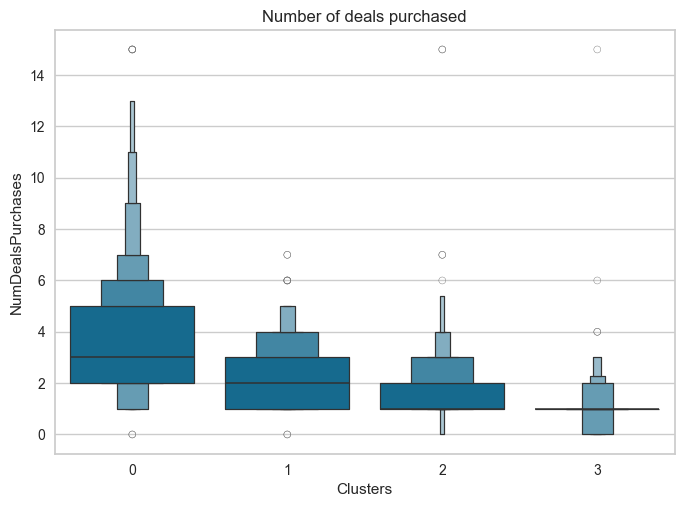

In [34]:
#Plotting number of deals purchased

plt.figure()
pl = sns.boxenplot(y=df['NumDealsPurchases'], x = df['Clusters'])
pl.set_title("Number of deals purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

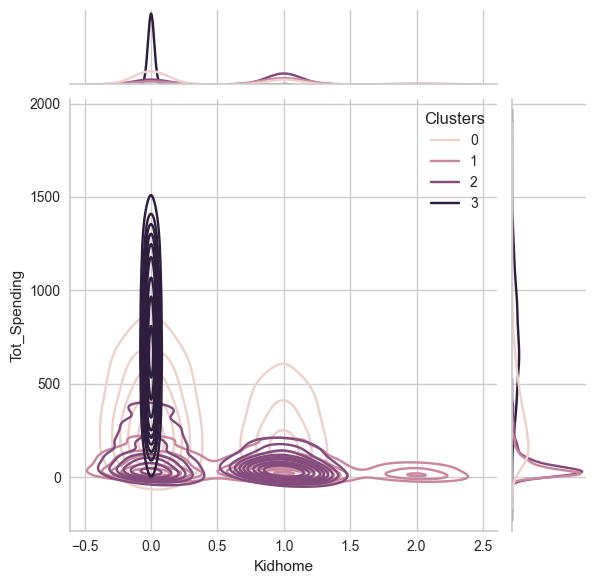

<Figure size 800x550 with 0 Axes>

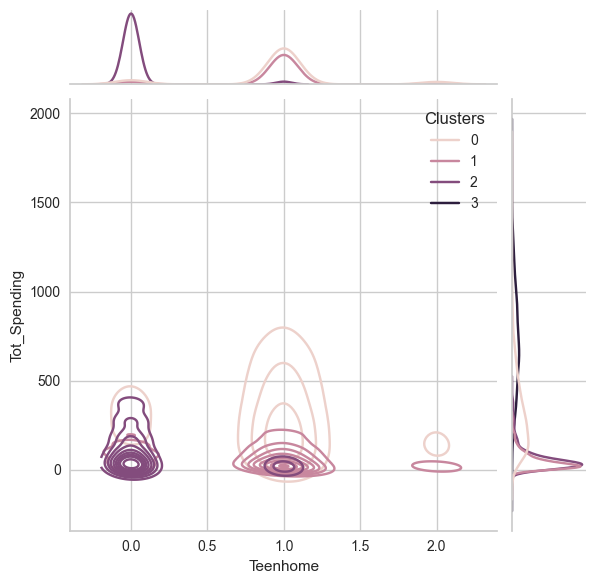

<Figure size 800x550 with 0 Axes>

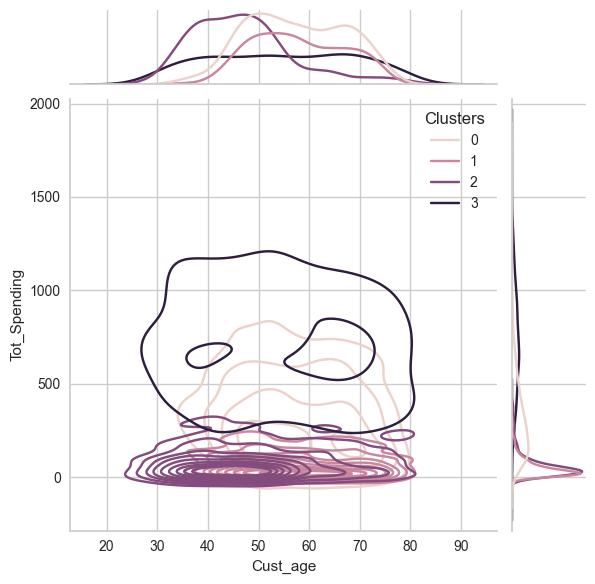

<Figure size 800x550 with 0 Axes>

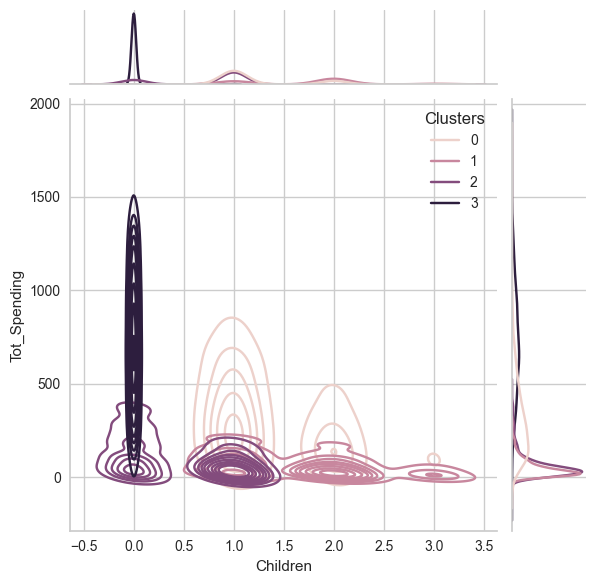

<Figure size 800x550 with 0 Axes>

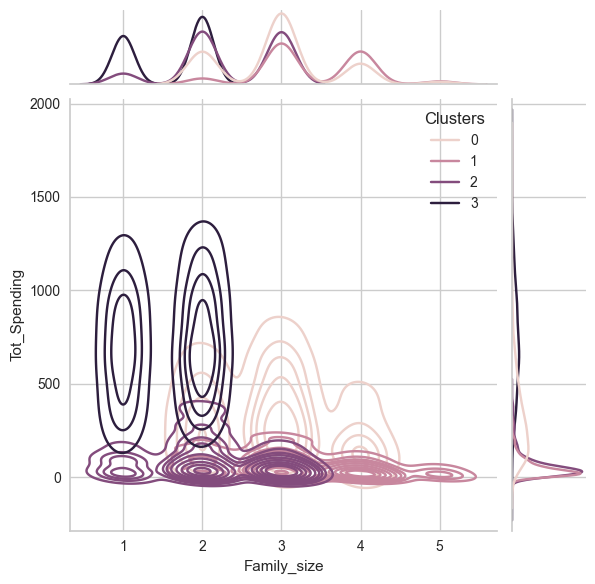

<Figure size 800x550 with 0 Axes>

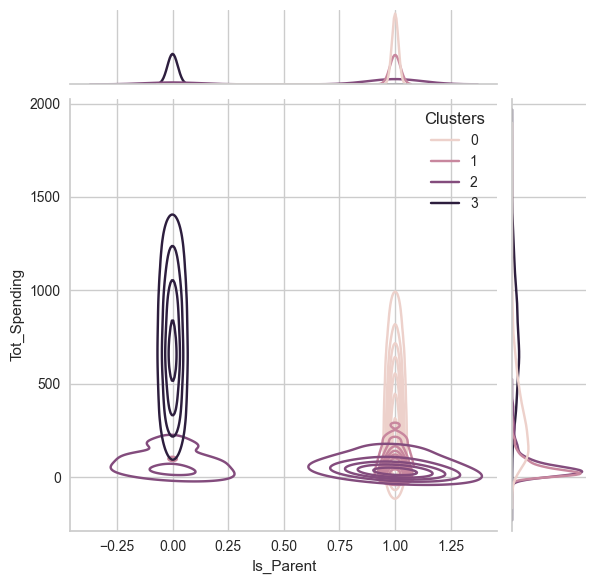

<Figure size 800x550 with 0 Axes>

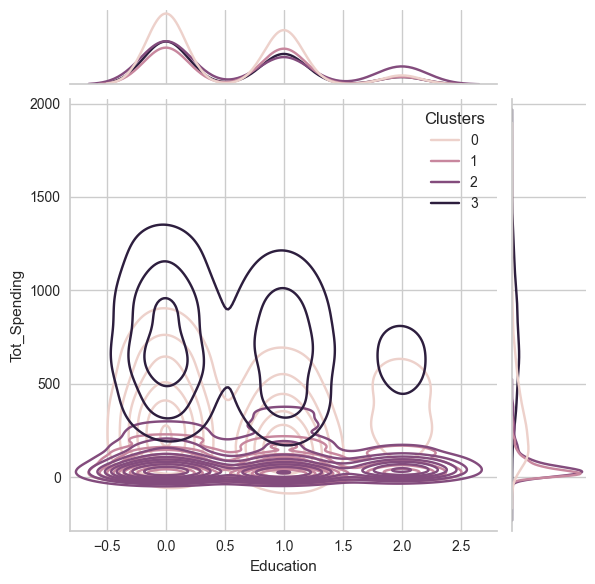

<Figure size 800x550 with 0 Axes>

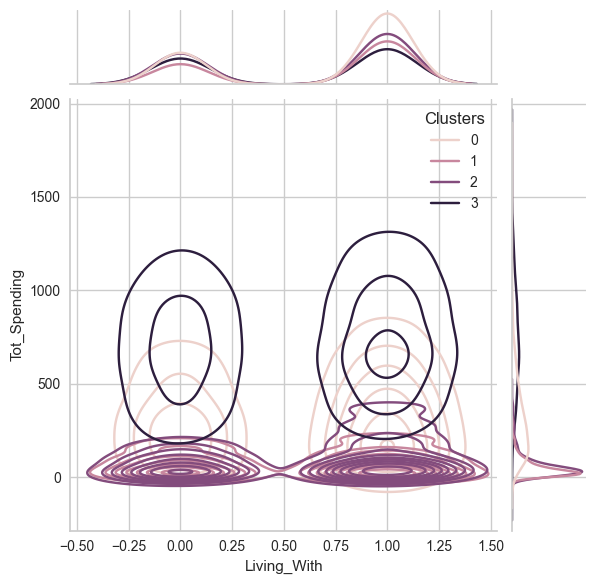

In [35]:
personal = ['Kidhome', 'Teenhome','Cust_age', 'Children', 'Family_size',
            'Is_Parent', 'Education', 'Living_With']

for i in personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df['Tot_Spending'],hue=df['Clusters'], kind='kde')
    plt.show()

